<a href="https://colab.research.google.com/github/ayushsingh17/ayushsingh17.github.io/blob/master/Project1_Classification_Group17_Raagni_Ayush.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification - Employee Attrition

-------------------------------------------------------------------------------------------------------------------------------


**DataSource:** https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset

**Summary:** This is an employee dataset in which HR is interested to understand how different factors are affecting                        attrition among employees.


-------------------------------------------------------------------------------------------------------------------------------

**Importing pandas and numpy library for data manipulation**

In [0]:
import pandas as pd
import numpy as np

**Imporitng CSV file**

In [0]:
from google.colab import files
uploaded = files.upload()

#df = pd.read_csv("hr.csv")

Saving hr.csv to hr (1).csv


In [0]:
import io
df = pd.read_csv(io.BytesIO(uploaded['hr.csv']))

**Viewing Data in the DataFrame**

In [0]:
df.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,Y,No,13,3,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,3,Female,81,4,1,Laboratory Technician,1,Married,2670,9964,4,Y,Yes,20,4,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,4,Male,67,3,1,Laboratory Technician,3,Divorced,2693,13335,1,Y,No,22,4,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,4,Male,44,2,3,Manufacturing Director,3,Single,9526,8787,0,Y,No,21,4,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,3,Male,94,3,2,Healthcare Representative,3,Married,5237,16577,6,Y,No,13,3,2,80,2,17,3,2,7,7,7,7


**Summary of DataFrame**

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

`The data set has 1470 rows and 35 columns.` 

**Checking for nulls**

In [0]:
df.isnull().sum().sum()

0

`No null exists in data`

### Analyzing Categorical Features

**Dataset has Ordinal values as listed below**

Education 1 'Below College' 2 'College' 3 'Bachelor' 4 'Master' 5 'Doctor'

EnvironmentSatisfaction 1 'Low' 2 'Medium' 3 'High' 4 'Very High'

JobInvolvement 
1 'Low' 2 'Medium' 3 'High' 4 'Very High'

JobLevel 1 'Level 1' 2 'Level 2' 3 'Level 3' 4 'Level 4' 5 'Level 5' 6 'Level 6'

JobSatisfaction 1 'Low' 2 'Medium' 3 'High' 4 'Very High'

PerformanceRating 
1 'Low' 2 'Good' 3 'Excellent' 4 'Outstanding'

RelationshipSatisfaction 
1 'Low' 2 'Medium' 3 'High' 4 'Very High'

StockOptionLevel 1 'Level 1' 2 'Level 2' 3 'Level 3' 4 'Level 4' 5 'Level 5'

WorkLifeBalance 1 'Bad' 2 'Good' 3 'Better' 4 'Best'

**Analyzing Ordinal Variables**

In [0]:
dfOrdinal = df[['Education','EnvironmentSatisfaction','JobInvolvement','JobLevel','JobSatisfaction','PerformanceRating','RelationshipSatisfaction','StockOptionLevel','WorkLifeBalance']]

dfOrdinal.head(10)

,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,WorkLifeBalance
0,2,2,3,2,4,3,1,0,1
1,1,3,2,2,2,4,4,1,3
2,2,4,2,1,3,3,2,0,3
3,4,4,3,1,3,3,3,0,3
4,1,1,3,1,2,3,4,1,3
5,2,4,3,1,4,3,3,0,2
6,3,3,4,1,1,4,1,3,2
7,1,4,3,1,3,4,2,1,3
8,3,4,2,3,3,4,2,0,3
9,3,3,3,2,3,3,2,2,2


In [0]:
dfOrdinal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 9 columns):
Education                   1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobSatisfaction             1470 non-null int64
PerformanceRating           1470 non-null int64
RelationshipSatisfaction    1470 non-null int64
StockOptionLevel            1470 non-null int64
WorkLifeBalance             1470 non-null int64
dtypes: int64(9)
memory usage: 103.4 KB


`9 Ordinal variables in Data`

`dtype for Ordinal variables is Integer`

**Analyzing Nominal Variables**

In [0]:
dfNominal = df.select_dtypes(include=['object'])

dfNominal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 9 columns):
Attrition         1470 non-null object
BusinessTravel    1470 non-null object
Department        1470 non-null object
EducationField    1470 non-null object
Gender            1470 non-null object
JobRole           1470 non-null object
MaritalStatus     1470 non-null object
Over18            1470 non-null object
OverTime          1470 non-null object
dtypes: object(9)
memory usage: 103.4+ KB


`9 Nominal Variables exist in data`

`Nominal Variables have object data type`

In [0]:
for col in dfNominal:
    if df[col].nunique()==2:
        print(col, df[col].nunique())

Attrition 2
Gender 2
OverTime 2


`Mapping Required - Column has only 2 type of values`

In [0]:
for col in dfNominal:        
    if df[col].nunique()>2:
        print(col, df[col].nunique())

BusinessTravel 3
Department 3
EducationField 6
JobRole 9
MaritalStatus 3


`One Hot Vector Required - Columns have more than 2 values`

### Identifying redundant columns

In [0]:
for col in df:
    if df[col].nunique()==1:
        print('\n',col,'has only 1 value throughout the dataset\n')
        print(df[col].head(5))
    


 EmployeeCount has only 1 value throughout the dataset

0    1
1    1
2    1
3    1
4    1
Name: EmployeeCount, dtype: int64

 Over18 has only 1 value throughout the dataset

0    Y
1    Y
2    Y
3    Y
4    Y
Name: Over18, dtype: object

 StandardHours has only 1 value throughout the dataset

0    80
1    80
2    80
3    80
4    80
Name: StandardHours, dtype: int64


`EmployeeCount, Over18 , StandardHours will not affect any other variables `

In [0]:
df.EmployeeNumber.nunique()

1470

In [0]:
df.EmployeeNumber.head(10)

0     1
1     2
2     4
3     5
4     7
5     8
6    10
7    11
8    12
9    13
Name: EmployeeNumber, dtype: int64

`EmployeeNumber is only an Identification number` 

**Dropping EmployeeCount, EmployeeNumber, Over18 and StandardHours**

In [0]:
df.drop(['EmployeeCount','EmployeeNumber','Over18','StandardHours'], axis=1, inplace = True)

In [0]:
dfNominal = df.select_dtypes(include=['object'])

In [0]:
df.shape

(1470, 31)

`Dataset has 14 Numerical Columns and 17 Categorical Columns`

### Analyzing Numerical Features

In [0]:
dfNumerical = df[['Age','DailyRate','DistanceFromHome','HourlyRate','MonthlyIncome','MonthlyRate','NumCompaniesWorked','PercentSalaryHike','TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]

dfNumerical.head(10)

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,94,5993,19479,8,11,8,0,6,4,0,5
1,49,279,8,61,5130,24907,1,23,10,3,10,7,1,7
2,37,1373,2,92,2090,2396,6,15,7,3,0,0,0,0
3,33,1392,3,56,2909,23159,1,11,8,3,8,7,3,0
4,27,591,2,40,3468,16632,9,12,6,3,2,2,2,2
5,32,1005,2,79,3068,11864,0,13,8,2,7,7,3,6
6,59,1324,3,81,2670,9964,4,20,12,3,1,0,0,0
7,30,1358,24,67,2693,13335,1,22,1,2,1,0,0,0
8,38,216,23,44,9526,8787,0,21,10,2,9,7,1,8
9,36,1299,27,94,5237,16577,6,13,17,3,7,7,7,7


In [0]:
dfNumerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 14 columns):
Age                        1470 non-null int64
DailyRate                  1470 non-null int64
DistanceFromHome           1470 non-null int64
HourlyRate                 1470 non-null int64
MonthlyIncome              1470 non-null int64
MonthlyRate                1470 non-null int64
NumCompaniesWorked         1470 non-null int64
PercentSalaryHike          1470 non-null int64
TotalWorkingYears          1470 non-null int64
TrainingTimesLastYear      1470 non-null int64
YearsAtCompany             1470 non-null int64
YearsInCurrentRole         1470 non-null int64
YearsSinceLastPromotion    1470 non-null int64
YearsWithCurrManager       1470 non-null int64
dtypes: int64(14)
memory usage: 160.9 KB


`14 Numerical Variables exist in data`

`dtype of Numerical variables is int64`

### Adding Nulls and Symbols

In [0]:
np.random.seed(0)

`Seed to maintain data re-producibility`

In [0]:
for col in df:
    for x in range(40):
        x = np.random.randint(1, 1470)
        df[col].loc[x] = np.NaN
        x = np.random.randint(1, 1470)
        df[col].loc[x] = "*"

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


**Viewing the updated dataset with NaN and * values**

In [0]:
df.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,*,Life Sciences,3,NaN,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,*,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,*,1,*,1,Male,40,3,NaN,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,No,13,3,3,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,3,Female,81,4,1,Laboratory Technician,1,Married,2670,9964,4,Yes,NaN,4,1,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,4,Male,67,3,1,Laboratory Technician,3,Divorced,2693,13335,1,No,22,4,2,1,1,2,3,*,0,0,*
8,38,No,Travel_Frequently,216,Research & Development,*,3,Life Sciences,4,Male,*,2,3,Manufacturing Director,3,Single,9526,8787,0,No,21,4,2,0,10,*,3,9,*,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,3,Male,94,3,2,Healthcare Representative,NaN,Married,5237,16577,6,No,13,3,2,2,17,3,2,7,*,7,7


**NaN Values in Dataset**

In [0]:
df.isnull().sum().sum()

1203

**Star Values in Dataset**

In [0]:
count = 0

for col in df:
    for x in range(1470):
        if df[col].loc[x]=='*':
            count = count + 1
        
print("Total No. of Star values: ", count)

Total No. of Star values:  1202


**Calculating percentage of missing values**

In [0]:
( (df.isnull().sum().sum() + count ) / ( 1470 * 31 )) * 100

5.277594908931314

-------------------------------------------------------------------------------------------------------------------------------

# Brief Summary of DataSet


**Features/Columns:** 31

* **Categorical Columns:** 17

   **1. Nominal Columns:** 8
    
   **2. Ordinal Columns:** 9
   

* **Numerical Columns:** 14

**Rows:** 1470

**Percentage Missing Values:** 5.28 %

**Target Value:** Attrition
   

-------------------------------------------------------------------------------------------------------------------------------

**Replacing Star Symbols with NaN**

In [0]:
df = df.replace('*', np.nan)

In [0]:
df.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.0,Yes,Travel_Rarely,1102.0,Sales,1.0,2.0,Life Sciences,2.0,Female,94.0,3.0,2.0,Sales Executive,4.0,Single,5993.0,19479.0,8.0,Yes,11.0,3.0,1.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0
1,49.0,No,Travel_Frequently,279.0,Research & Development,8.0,NaN,Life Sciences,3.0,NaN,61.0,2.0,2.0,Research Scientist,2.0,Married,5130.0,24907.0,1.0,No,23.0,4.0,4.0,1.0,10.0,3.0,3.0,10.0,7.0,1.0,7.0
2,37.0,Yes,Travel_Rarely,1373.0,Research & Development,2.0,2.0,Other,4.0,Male,92.0,2.0,1.0,Laboratory Technician,3.0,Single,2090.0,2396.0,6.0,Yes,15.0,3.0,2.0,0.0,7.0,3.0,3.0,0.0,0.0,0.0,0.0
3,33.0,No,Travel_Frequently,1392.0,Research & Development,3.0,4.0,Life Sciences,4.0,Female,56.0,3.0,1.0,Research Scientist,3.0,Married,2909.0,23159.0,NaN,Yes,11.0,3.0,3.0,0.0,8.0,3.0,3.0,8.0,7.0,3.0,0.0
4,27.0,No,Travel_Rarely,591.0,Research & Development,NaN,1.0,NaN,1.0,Male,40.0,3.0,NaN,Laboratory Technician,2.0,Married,3468.0,16632.0,9.0,No,12.0,3.0,4.0,1.0,6.0,3.0,3.0,2.0,2.0,2.0,2.0
5,32.0,No,Travel_Frequently,1005.0,Research & Development,2.0,2.0,Life Sciences,4.0,Male,79.0,3.0,1.0,Laboratory Technician,4.0,Single,3068.0,11864.0,0.0,No,13.0,3.0,3.0,0.0,8.0,2.0,2.0,7.0,7.0,3.0,6.0
6,59.0,No,Travel_Rarely,1324.0,Research & Development,3.0,3.0,Medical,3.0,Female,81.0,4.0,1.0,Laboratory Technician,1.0,Married,2670.0,9964.0,4.0,Yes,NaN,4.0,1.0,3.0,12.0,3.0,2.0,1.0,0.0,0.0,0.0
7,30.0,No,Travel_Rarely,1358.0,Research & Development,24.0,1.0,Life Sciences,4.0,Male,67.0,3.0,1.0,Laboratory Technician,3.0,Divorced,2693.0,13335.0,1.0,No,22.0,4.0,2.0,1.0,1.0,2.0,3.0,NaN,0.0,0.0,NaN
8,38.0,No,Travel_Frequently,216.0,Research & Development,NaN,3.0,Life Sciences,4.0,Male,NaN,2.0,3.0,Manufacturing Director,3.0,Single,9526.0,8787.0,0.0,No,21.0,4.0,2.0,0.0,10.0,NaN,3.0,9.0,NaN,1.0,8.0
9,36.0,No,Travel_Rarely,1299.0,Research & Development,27.0,3.0,Medical,3.0,Male,94.0,3.0,2.0,Healthcare Representative,NaN,Married,5237.0,16577.0,6.0,No,13.0,3.0,2.0,2.0,17.0,3.0,2.0,7.0,NaN,7.0,7.0


### Feature Imputation



**Imputing for Numerical Values**

In [0]:
dfNumerical = df[['Age','DailyRate','DistanceFromHome','HourlyRate','MonthlyIncome','MonthlyRate','NumCompaniesWorked','PercentSalaryHike','TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]

In [0]:
for col in dfNumerical:
    df[col]=df[col].fillna(df[col].median())

`Replacing NaN values with Median values`

In [0]:
dfNumerical = df[['Age','DailyRate','DistanceFromHome','HourlyRate','MonthlyIncome','MonthlyRate','NumCompaniesWorked','PercentSalaryHike','TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]

dfNumerical.isnull().sum().sum()

0

In [0]:
dfNumerical.head(10)

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.0,1102.0,1.0,94.0,5993.0,19479.0,8.0,11.0,8.0,0.0,6.0,4.0,0.0,5.0
1,49.0,279.0,8.0,61.0,5130.0,24907.0,1.0,23.0,10.0,3.0,10.0,7.0,1.0,7.0
2,37.0,1373.0,2.0,92.0,2090.0,2396.0,6.0,15.0,7.0,3.0,0.0,0.0,0.0,0.0
3,33.0,1392.0,3.0,56.0,2909.0,23159.0,2.0,11.0,8.0,3.0,8.0,7.0,3.0,0.0
4,27.0,591.0,7.0,40.0,3468.0,16632.0,9.0,12.0,6.0,3.0,2.0,2.0,2.0,2.0
5,32.0,1005.0,2.0,79.0,3068.0,11864.0,0.0,13.0,8.0,2.0,7.0,7.0,3.0,6.0
6,59.0,1324.0,3.0,81.0,2670.0,9964.0,4.0,14.0,12.0,3.0,1.0,0.0,0.0,0.0
7,30.0,1358.0,24.0,67.0,2693.0,13335.0,1.0,22.0,1.0,2.0,5.0,0.0,0.0,3.0
8,38.0,216.0,7.0,66.0,9526.0,8787.0,0.0,21.0,10.0,3.0,9.0,3.0,1.0,8.0
9,36.0,1299.0,27.0,94.0,5237.0,16577.0,6.0,13.0,17.0,3.0,7.0,3.0,7.0,7.0


**Imputing for Categorical Values**

In [0]:
dfOrdinal = df[['Education','EnvironmentSatisfaction','JobInvolvement','JobLevel','JobSatisfaction','PerformanceRating','RelationshipSatisfaction','StockOptionLevel','WorkLifeBalance']]

for col in dfOrdinal:
    df[col] = df[col].astype('object') 

In [0]:
dfC = df.select_dtypes(include=['object'])

for col in dfC:
    df[col] = df[col].fillna(df[col].value_counts().index[0])

`Replacing NaN values with Mode Values`

In [0]:
df.isnull().sum().sum()

0

`No null value exists in dataset now`

In [0]:
dfC = df.select_dtypes(include=['object'])

### Analyzing Target Variable

In [0]:
print(df['Attrition'].unique())

['Yes' 'No']


`2 unique values for Attrition - Target Variable`

In [0]:
print(df.groupby('Attrition').size())

Attrition
No     1252
Yes     218
dtype: int64


`Data is unbalanced`

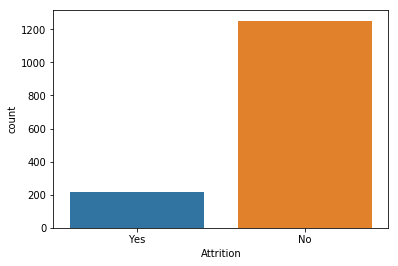

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(df['Attrition'],label="Count")
plt.show()

`Very few employees are leaving the organization`

**Histogram of DataSet**

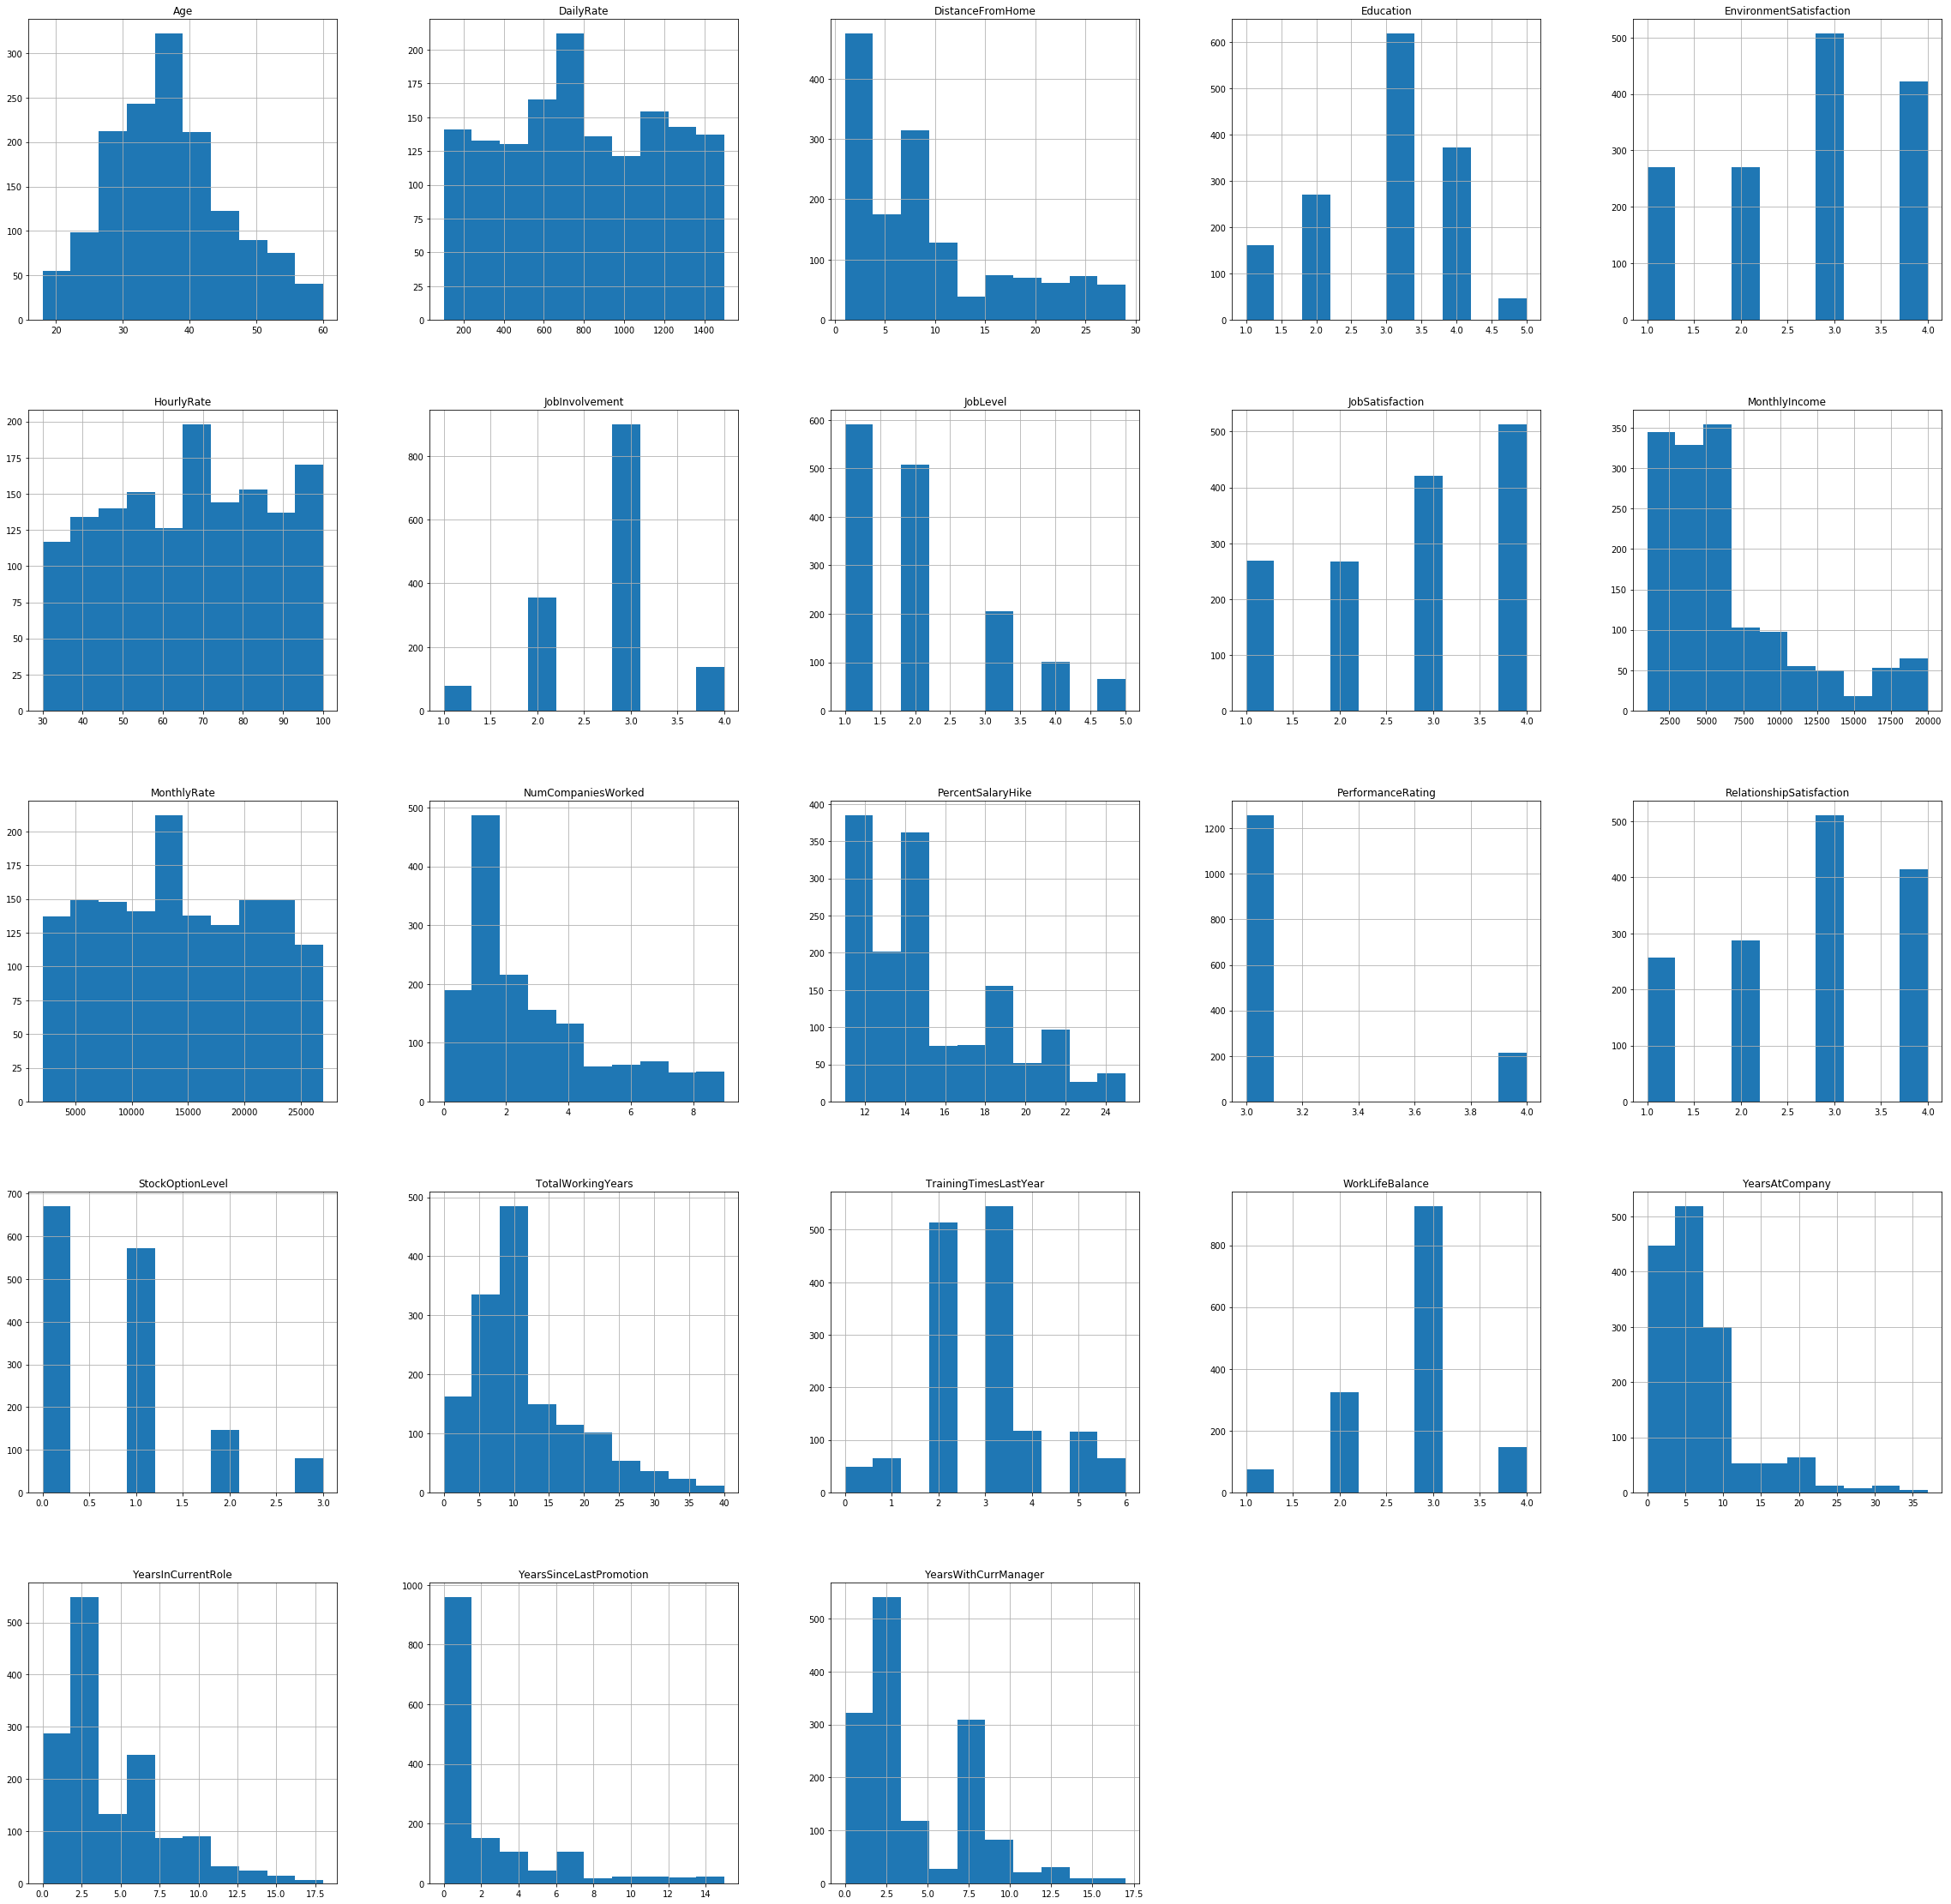

In [0]:
pd.DataFrame.hist(df, figsize = [40,40]);

**Frequency Distribution of Categorical Features**

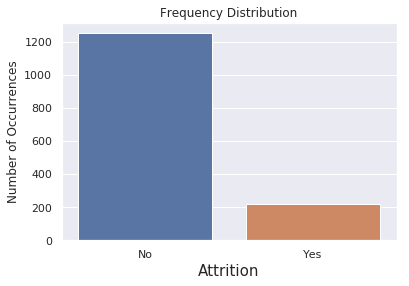

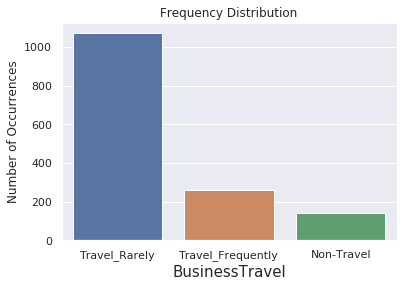

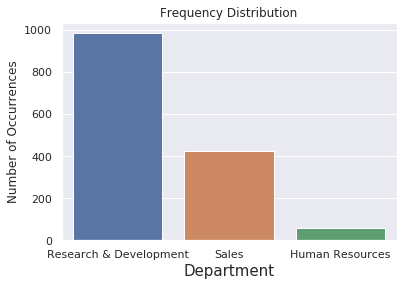

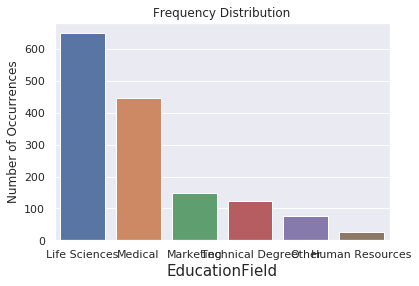

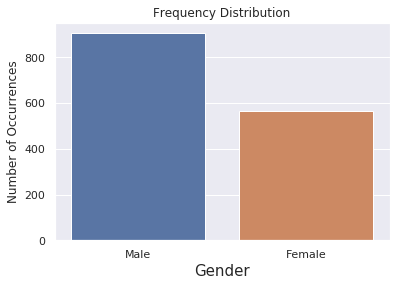

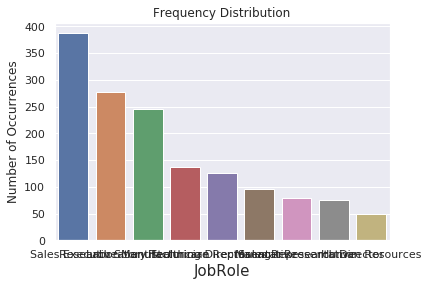

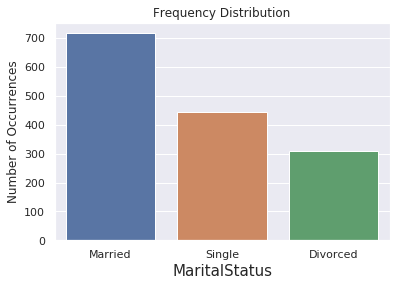

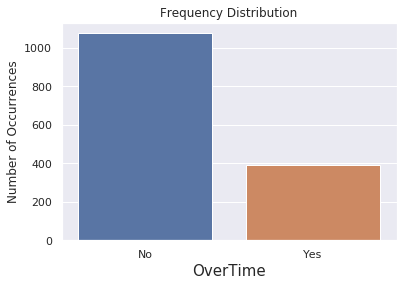

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in dfC:
    count = df[col].value_counts()
    sns.set(style="darkgrid")
    sns.barplot(count.index, count.values)
    plt.title('Frequency Distribution',fontsize=12)
    plt.ylabel('Number of Occurrences', fontsize=12)
    plt.xlabel(col, fontsize=15)
    plt.show()



### Encoding Categorical Features

**Mapping Nominal Variables**

In [0]:
dfCat = df[['Attrition','BusinessTravel','Department','Education','EducationField','EnvironmentSatisfaction','Gender','JobInvolvement','JobLevel','JobRole','JobSatisfaction','MaritalStatus','OverTime','PerformanceRating','RelationshipSatisfaction','StockOptionLevel','WorkLifeBalance']]

In [0]:
dfCat['Attrition'] = dfCat['Attrition'].map({'Yes':1, 'No':0})
dfCat['Gender'] = dfCat['Gender'].map({'Male':1, 'Female':0})
dfCat['OverTime'] = dfCat['OverTime'].map({'Yes':1, 'No':0})

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

`Mapping used since column have only 2 type of values`

**One Hot Vector**

In [0]:
dfname = ['BusinessTravel','Department','EducationField','JobRole','MaritalStatus']

for col in dfname:
    data = pd.get_dummies(df[col], prefix=col)
    dfCat = pd.concat([dfCat,data], axis = 1)
    dfCat.drop(col, axis = 1, inplace=True)

`One Hot Vector used since column have more than 2 type of values`

In [0]:
dfCat.head(10)

,Attrition,Education,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,OverTime,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,WorkLifeBalance,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,1,2.0,2.0,0,3.0,2.0,4.0,1,3.0,1.0,0.0,1.0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,0,3.0,3.0,1,2.0,2.0,2.0,0,4.0,4.0,1.0,3.0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,1,2.0,4.0,1,2.0,1.0,3.0,1,3.0,2.0,0.0,3.0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
3,0,4.0,4.0,0,3.0,1.0,3.0,1,3.0,3.0,0.0,3.0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0,1.0,1.0,1,3.0,1.0,2.0,0,3.0,4.0,1.0,3.0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
5,0,2.0,4.0,1,3.0,1.0,4.0,0,3.0,3.0,0.0,2.0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
6,0,3.0,3.0,0,4.0,1.0,1.0,1,4.0,1.0,3.0,2.0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
7,0,1.0,4.0,1,3.0,1.0,3.0,0,4.0,2.0,1.0,3.0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
8,0,3.0,4.0,1,2.0,3.0,3.0,0,4.0,2.0,0.0,3.0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
9,0,3.0,3.0,1,3.0,2.0,4.0,0,3.0,2.0,2.0,2.0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [0]:
dfNum = df[['Age','DailyRate','DistanceFromHome','HourlyRate','MonthlyIncome','MonthlyRate','NumCompaniesWorked','PercentSalaryHike','TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]

dfCombined = pd.concat([dfNum,dfCat], axis = 1)

###  Skewness Check

In [0]:
for i in range(0,len(dfCombined.columns)):
    print(dfCombined.columns.values[i],'--- {:,.2f}'.format(dfCombined.iloc[:,i].value_counts(normalize=True).values[0]*100), '% skewed ')


Age --- 9.86 % skewed 
DailyRate --- 5.44 % skewed 
DistanceFromHome --- 13.74 % skewed 
HourlyRate --- 7.14 % skewed 
MonthlyIncome --- 5.37 % skewed 
MonthlyRate --- 5.31 % skewed 
NumCompaniesWorked --- 33.13 % skewed 
PercentSalaryHike --- 18.03 % skewed 
TotalWorkingYears --- 17.96 % skewed 
TrainingTimesLastYear --- 37.07 % skewed 
YearsAtCompany --- 17.55 % skewed 
YearsInCurrentRole --- 23.61 % skewed 
YearsSinceLastPromotion --- 37.55 % skewed 
YearsWithCurrManager --- 22.38 % skewed 
Attrition --- 85.17 % skewed 
Education --- 42.11 % skewed 
EnvironmentSatisfaction --- 34.49 % skewed 
Gender --- 61.56 % skewed 
JobInvolvement --- 61.16 % skewed 
JobLevel --- 40.20 % skewed 
JobSatisfaction --- 34.90 % skewed 
OverTime --- 73.27 % skewed 
PerformanceRating --- 85.51 % skewed 
RelationshipSatisfaction --- 34.76 % skewed 
StockOptionLevel --- 45.65 % skewed 
WorkLifeBalance --- 63.06 % skewed 
BusinessTravel_Non-Travel --- 90.48 % skewed 
BusinessTravel_Travel_Frequently --- 82

`No feature is 100% skewed`

### Data Preparation

In [0]:
data = dfCombined

In [0]:
data.shape

(1470, 50)

In [0]:
#from scipy import stats
#import numpy as np
#z = np.abs(stats.zscore(data))
#print(z)

#threshold = 3
#print(np.where(z > 3))

#data = data[(z < 3).all(axis=1)]
#data.shape

In [0]:
feature_columns = ['Age',
 'DailyRate',
 'DistanceFromHome',
 'HourlyRate',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager',
 'Education',
 'EnvironmentSatisfaction',
 'Gender',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'OverTime',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'WorkLifeBalance',
 'BusinessTravel_Non-Travel',
 'BusinessTravel_Travel_Frequently',
 'BusinessTravel_Travel_Rarely',
 'Department_Human Resources',
 'Department_Research & Development',
 'Department_Sales',
 'EducationField_Human Resources',
 'EducationField_Life Sciences',
 'EducationField_Marketing',
 'EducationField_Medical',
 'EducationField_Other',
 'EducationField_Technical Degree',
 'JobRole_Healthcare Representative',
 'JobRole_Human Resources',
 'JobRole_Laboratory Technician',
 'JobRole_Manager',
 'JobRole_Manufacturing Director',
 'JobRole_Research Director',
 'JobRole_Research Scientist',
 'JobRole_Sales Executive',
 'JobRole_Sales Representative',
 'MaritalStatus_Divorced',
 'MaritalStatus_Married',
 'MaritalStatus_Single']


In [0]:
X = data.drop(['Attrition'],axis=1, inplace=False)

y = data['Attrition']

### Split the Data

In [0]:
from sklearn.model_selection import train_test_split

X_train_org, X_test_org, y_train, y_test = train_test_split(X,y,random_state=0)

In [0]:
print('X_train shape is', X_train_org.shape)
print('X_test shape is', X_test_org.shape)
print('y_train shape is', y_train.shape)
print('y_test shape is', y_test.shape)

X_train shape is (1102, 49)
X_test shape is (368, 49)
y_train shape is (1102,)
y_test shape is (368,)


**Correlation Matrix**

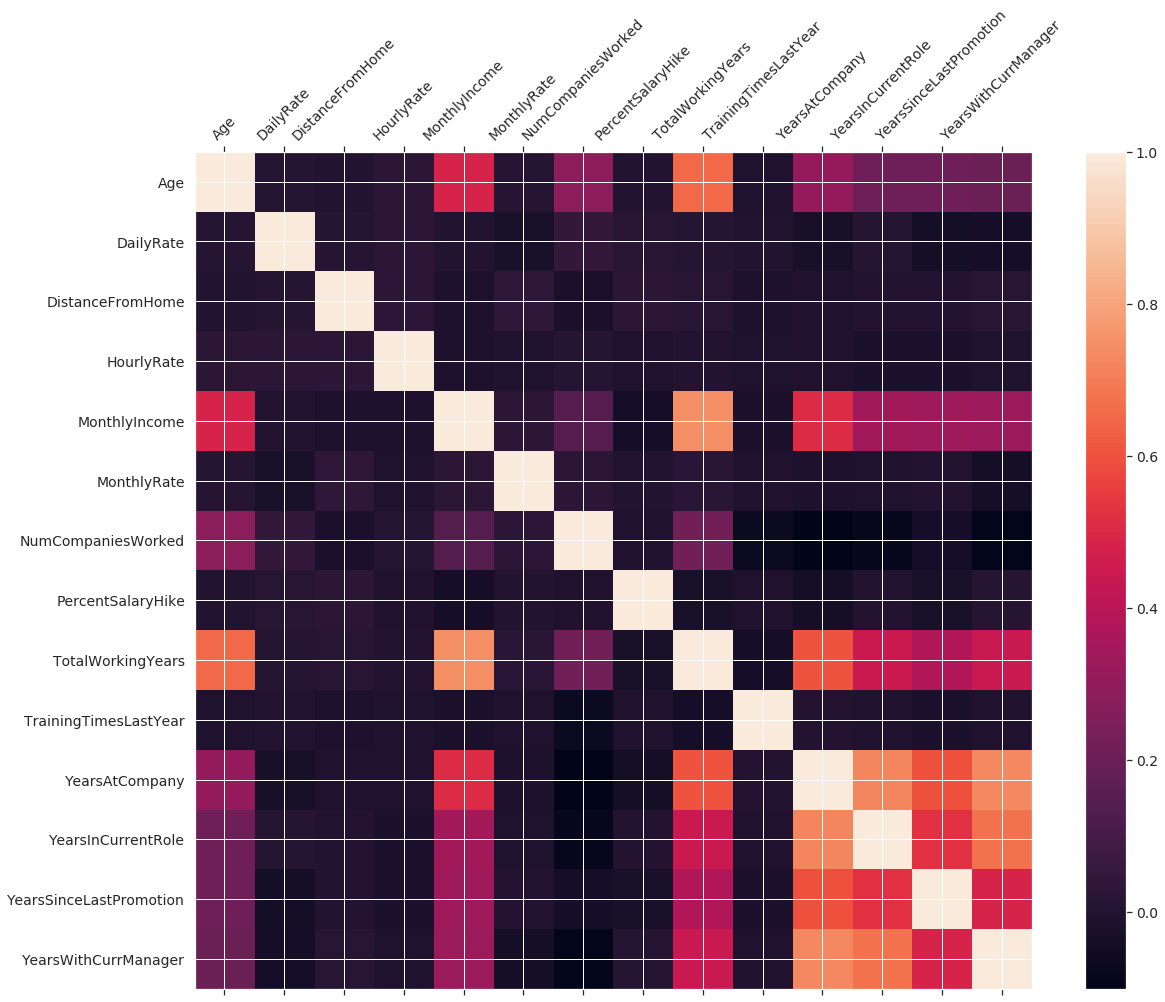

In [0]:
f = plt.figure(figsize=(19, 15))
plt.matshow(data[feature_columns[:14]].corr(), fignum=f.number)
plt.xticks(range(data[feature_columns[:14]].shape[1]), data[feature_columns[:14]].columns, fontsize=14, rotation=45)
plt.yticks(range(data[feature_columns[:14]].shape[1]), data[feature_columns[:14]].columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

In [0]:
X_train_org.describe()

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Education,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,OverTime,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,WorkLifeBalance,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
count,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000,1102.000000
mean,36.840290,799.159710,9.063521,65.312160,6433.647913,14290.242287,2.727768,15.068058,11.153358,2.799456,6.859347,4.154265,2.141561,4.029038,2.931034,2.755898,0.628857,2.740472,2.005445,2.805808,0.259528,3.140653,2.725045,0.754991,2.783122,0.098004,0.173321,0.728675,0.042650,0.673321,0.284029,0.018149,0.447368,0.101633,0.302178,0.045372,0.085299,0.081670,0.033575,0.169691,0.062613,0.089837,0.052632,0.194192,0.262250,0.053539,0.212341,0.479129,0.308530
std,8.786389,397.736495,7.902652,19.924668,4653.028966,6919.777789,2.494741,3.557992,7.610350,1.219982,5.930202,3.573768,3.171443,3.474975,0.979703,1.072883,0.483330,0.706641,1.101550,1.098444,0.438575,0.347821,1.056827,0.848061,0.693270,0.297455,0.378697,0.444845,0.202158,0.469212,0.451155,0.133550,0.497448,0.302303,0.459410,0.208213,0.279454,0.273985,0.180215,0.375532,0.242376,0.286077,0.223398,0.395757,0.440058,0.225208,0.409151,0.499791,0.462096
min,18.000000,104.000000,1.000000,30.000000,1009.000000,2094.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,469.000000,2.000000,48.000000,2972.250000,8451.500000,1.000000,12.000000,6.000000,2.000000,3.000000,2.000000,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,1.000000,2.000000,0.000000,3.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,36.000000,796.000000,7.000000,66.000000,4936.000000,14284.000000,2.000000,14.000000,10.000000,3.000000,5.000000,3.000000,1.000000,3.000000,3.000000,3.000000,1.000000,3.000000,2.000000,3.000000,0.000000,3.000000,3.000000,1.000000,3.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,42.000000,1144.000000,13.000000,82.000000,7975.750000,20076.500000,4.000000,17.000000,15.00000

`X_train has has varying range for different features so it is necessary to scale it`

### Scale the Data

In [0]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

`MinMaxScaler rescales the data set such that all feature values are in the range [0, 1] while preserving the original
distribution.`

## Evaluation Strategy

The HR is interested to reduce the Attrition in the organization so it's necessary for HR to know which employees have more
tendency to leave the organisation. Thus, in this scenario HR would avoid loosing out on an employee who is wrongly classified
as not leaving however he is actually leaving. Therefore, using **Confusion Matrix** will be the best evaluation strategy here.

Aim will be to reduce false negative that is **Type II error**. So we have to increase recall here.

In [0]:
from sklearn.metrics import confusion_matrix

## KNN Classification

In [0]:
from sklearn.neighbors import KNeighborsClassifier  

train_score_list = []
test_score_list = []

for k in range(1,20):
    knn = KNeighborsClassifier(k)
    knn.fit(X_train, y_train)
    train_score_list.append(knn.score(X_train, y_train))
    test_score_list.append(knn.score(X_test, y_test))
    
print(train_score_list)
print(test_score_list)

[1.0, 0.8911070780399274, 0.8983666061705989, 0.8656987295825771, 0.8720508166969148, 0.8584392014519057, 0.8611615245009074, 0.8566243194192378, 0.8656987295825771, 0.8584392014519057, 0.8620689655172413, 0.8611615245009074, 0.8611615245009074, 0.8584392014519057, 0.8593466424682396, 0.8575317604355717, 0.8584392014519057, 0.8557168784029038, 0.8593466424682396]
[0.8043478260869565, 0.8478260869565217, 0.8505434782608695, 0.8614130434782609, 0.8641304347826086, 0.8614130434782609, 0.8614130434782609, 0.8586956521739131, 0.8641304347826086, 0.8641304347826086, 0.8614130434782609, 0.8641304347826086, 0.8668478260869565, 0.8641304347826086, 0.8641304347826086, 0.8614130434782609, 0.8641304347826086, 0.8641304347826086, 0.8641304347826086]


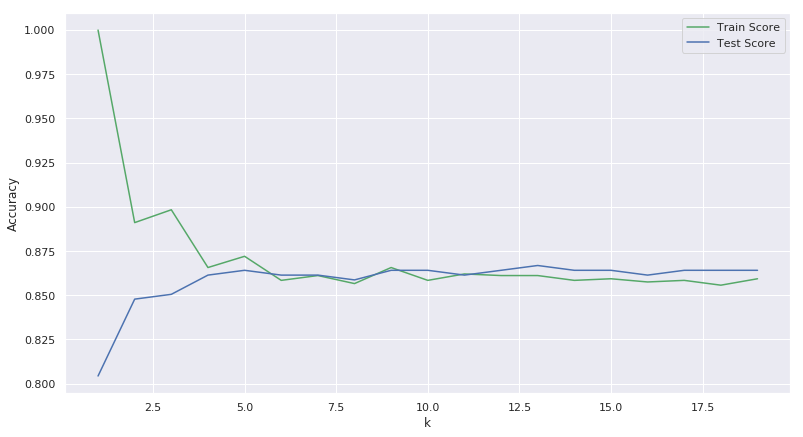

In [0]:
x_axis = range(1,20)
%matplotlib inline
fig ,ax= plt.subplots(figsize = (13,7))
plt.plot(x_axis, train_score_list, label = 'Train Score', c = 'g')
plt.plot(x_axis, test_score_list, label = 'Test Score', c='b')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()

`K = 9 seems to be the best parameter`

In [0]:
knn = KNeighborsClassifier(9)
knn.fit(X_train, y_train)
print('Train score: {:.4f}'.format(knn.score(X_train, y_train)))
print('Train score: {:.4f}'.format(knn.score(X_test, y_test)))

pred_knn = knn.predict(X_test)

confusion = confusion_matrix(y_test, pred_knn)
print("\nConfusion matrix:\n{}".format(confusion))
print('\nAccuracy = {:.4f}'.format((5+313)/(48+5+313+2)*100))

Train score: 0.8657
Train score: 0.8641

Confusion matrix:
[[313   2]
 [ 48   5]]

Accuracy = 86.4130


In [0]:
print('Recall = {:.4f}'.format((5/(48+5))))

Recall = 0.0943


In [0]:
from sklearn import metrics
precisions, recall, f1_score, _ = metrics.precision_recall_fscore_support(y_test, pred_knn)
print("Recall Score (test): %.4f" % recall[1:])
print("Precision Score (test): %.4f" % precisions[1:])
print("F1 Score (test): %.4f" % f1_score[1:])
print("AUC Score (test): %.4f" % metrics.roc_auc_score(y_test, pred_knn))

Recall Score (test): 0.0943
Precision Score (test): 0.7143
F1 Score (test): 0.1667
AUC Score (test): 0.5440


`KNN Classifier is not good for prediciton`

## Logistic Regression

In [0]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train,y_train)

print("Train scores: {}".format(logreg.score(X_train, y_train)))
print("Test scores: {}".format(logreg.score(X_test, y_test)))

Train scores: 0.8811252268602541
Test scores: 0.8967391304347826


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
c_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_score_l1 = []
train_score_l2 = []
test_score_l1 = []
test_score_l2 = []

for c in c_range:
    log_l1 = LogisticRegression(penalty = 'l1', C = c)
    log_l2 = LogisticRegression(penalty = 'l2', C = c)
    log_l1.fit(X_train, y_train)
    log_l2.fit(X_train, y_train)
    train_score_l1.append(log_l1.score(X_train, y_train))
    train_score_l2.append(log_l2.score(X_train, y_train))
    test_score_l1.append(log_l1.score(X_test, y_test))
    test_score_l2.append(log_l2.score(X_test, y_test))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

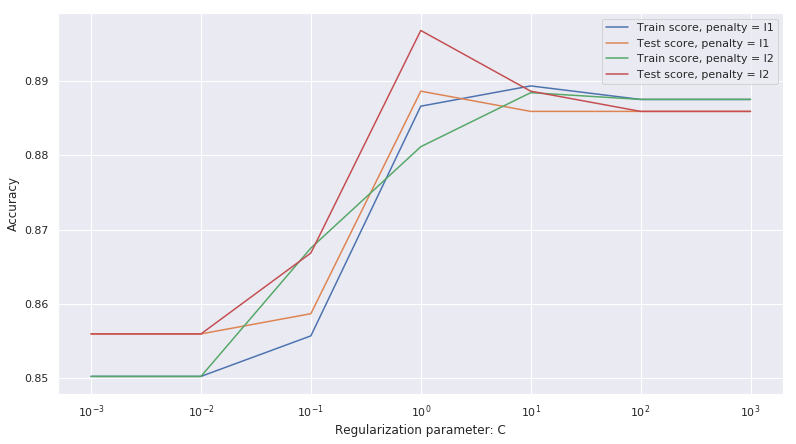

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
fig ,ax= plt.subplots(figsize = (13,7))
plt.plot(c_range, train_score_l1, label = 'Train score, penalty = l1')
plt.plot(c_range, test_score_l1, label = 'Test score, penalty = l1')
plt.plot(c_range, train_score_l2, label = 'Train score, penalty = l2')
plt.plot(c_range, test_score_l2, label = 'Test score, penalty = l2')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('Accuracy')
plt.xscale('log')

`C = 10 seems to be the best parameter with Penalty l2`

In [0]:
logreg = LogisticRegression(penalty='l2',C=10,random_state=0)
logreg.fit(X_train,y_train)

print("Train scores: {}".format(logreg.score(X_train, y_train)))
print("Test scores: {}".format(logreg.score(X_test, y_test)))


pred_lreg = logreg.predict(X_test)

confusion = confusion_matrix(y_test, pred_lreg)
print("\nConfusion matrix:\n{}".format(confusion))
print('\nAccuracy = {:.4f}'.format((20+307)/(20+307+33+8)*100))

Train scores: 0.8883847549909256
Test scores: 0.8885869565217391

Confusion matrix:
[[307   8]
 [ 33  20]]

Accuracy = 88.8587


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
print('Recall = {:.4f}'.format((20/(20+33))))

Recall = 0.3774


`Logistic Regression model is performing better than KNN`

In [0]:
precisions, recall, f1_score, _ = metrics.precision_recall_fscore_support(y_test, pred_lreg)
print("Recall Score (test): %.4f" % recall[1:])
print("Precision Score (test): %.4f" % precisions[1:])
print("F1 Score (test): %.4f" % f1_score[1:])
print("AUC Score (test): %.4f" % metrics.roc_auc_score(y_test, pred_lreg))

Recall Score (test): 0.3774
Precision Score (test): 0.7143
F1 Score (test): 0.4938
AUC Score (test): 0.6760


## LinearSVC

In [0]:
from sklearn.svm import LinearSVC

clf = LinearSVC()
clf.fit(X_train,y_train)

print("Train scores: {}".format(clf.score(X_train, y_train)))
print("Test scores: {}".format(clf.score(X_test, y_test)))


Train scores: 0.8847549909255898
Test scores: 0.8858695652173914


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


Text(0, 0.5, 'YearsWithCurrManager')

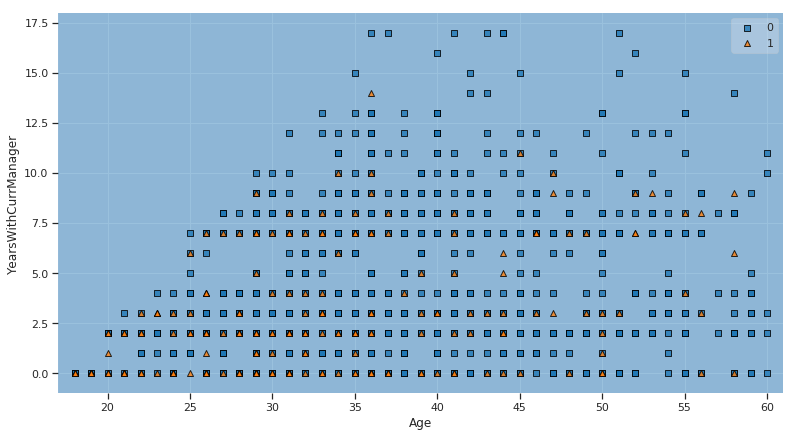

In [0]:
X = data[['Age','YearsWithCurrManager']].to_numpy()
y = data['Attrition'].to_numpy()

clf = LinearSVC()
clf.fit(X,y)

%matplotlib inline
fig ,ax= plt.subplots(figsize = (13,7))
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X, y, clf)
plt.xlabel("Age")
plt.ylabel("YearsWithCurrManager")


In [0]:
clf = LinearSVC()
clf.fit(X_train,y_train)

pred_lsvc = clf.predict(X_test)

confusion = confusion_matrix(y_test, pred_lsvc)
print("Confusion matrix:\n{}".format(confusion))

print('\nAccuracy = {:.4f}'.format((15+311)/(38+4+311+15)*100))

Confusion matrix:
[[311   4]
 [ 38  15]]

Accuracy = 88.5870


In [0]:
print('Recall = {:.4f}'.format((15/(38+15))))

Recall = 0.2830


`Logistic is still better than Linear SVC`

In [0]:
precisions, recall, f1_score, _ = metrics.precision_recall_fscore_support(y_test, pred_lsvc)
print("Recall Score (test): %.4f" % recall[1:])
print("Precision Score (test): %.4f" % precisions[1:])
print("F1 Score (test): %.4f" % f1_score[1:])
print("AUC Score (test): %.4f" % metrics.roc_auc_score(y_test, pred_lsvc))

Recall Score (test): 0.2830
Precision Score (test): 0.7895
F1 Score (test): 0.4167
AUC Score (test): 0.6352


## SVC Kernel - RBF


In [0]:
from sklearn.svm import SVC

c_range = [0.001,0.01,0.1,1,10,100]
g_range = [0.001,0.01,0.1,1,10,100]

train_score_list = []
test_score_list = []
index=[]

for x in c_range:
    for g in g_range:
        index.append((x,g))
        svc_rbf = SVC(kernel='rbf', gamma=g,C=x)
        svc_rbf.fit(X_train,y_train)
        train_score_list.append(svc_rbf.score(X_train,y_train))
        test_score_list.append(svc_rbf.score(X_test, y_test))

Text(0.5, 0, 'C and Gamma')

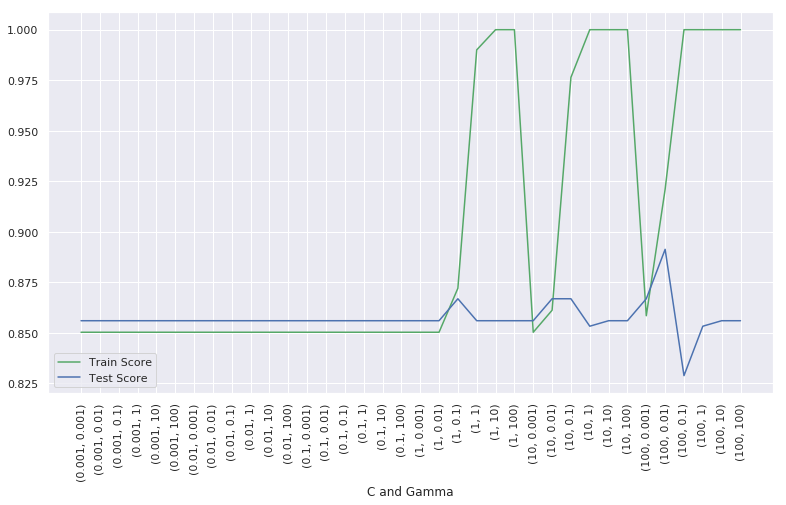

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
fig ,ax= plt.subplots(figsize = (13,7))
plt.plot(range(len(index)), train_score_list, c = 'g', label = 'Train Score')
plt.plot(range(len(index)), test_score_list, c = 'b', label = 'Test Score')
plt.legend(loc = 3)
plt.grid(True)
plt.xticks(range(len(index)), index, rotation=90)
plt.xlabel('C and Gamma')

`C = 100 and gamma = 0.001 seems to be the best parameter`

In [0]:
svc_rbf = SVC(kernel='rbf', gamma=0.001,C=100)
svc_rbf.fit(X_train,y_train)

print("Train scores: {}".format(svc_rbf.score(X_train, y_train)))
print("Test scores: {}".format(svc_rbf.score(X_test, y_test)))

pred_svcrbf = svc_rbf.predict(X_test)

confusion = confusion_matrix(y_test, pred_svcrbf)
print("Confusion matrix:\n{}".format(confusion))
print('\nAccuracy = {:.4f}'.format((4+315)/(315+4+49+0)*100))

Train scores: 0.8584392014519057
Test scores: 0.8668478260869565
Confusion matrix:
[[315   0]
 [ 49   4]]

Accuracy = 86.6848


In [0]:
print('Recall = {:.4f}'.format((4/(49+315))))

Recall = 0.0110


`This is the worst performing model so far`

In [0]:
precisions, recall, f1_score, _ = metrics.precision_recall_fscore_support(y_test, pred_svcrbf)
print("Recall Score (test): %.4f" % recall[1:])
print("Precision Score (test): %.4f" % precisions[1:])
print("F1 Score (test): %.4f" % f1_score[1:])
print("AUC Score (test): %.4f" % metrics.roc_auc_score(y_test, pred_svcrbf))

Recall Score (test): 0.0755
Precision Score (test): 1.0000
F1 Score (test): 0.1404
AUC Score (test): 0.5377


## SVC Kernel - Polynomial

In [0]:
deg_range = [1,2,3,4,5,6,7]
c_range = [0.001,0.01,0.1,1,10,100]


train_score_list = []
test_score_list = []
index=[]

for x in deg_range:
    for c in c_range:
        index.append((x,c))
        svc_poly = SVC(kernel='poly', degree=x, C=c)
        svc_poly.fit(X_train,y_train)
        train_score_list.append(svc_poly.score(X_train,y_train))
        test_score_list.append(svc_poly.score(X_test, y_test))

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default 

Text(0.5, 0, 'Degree and C')

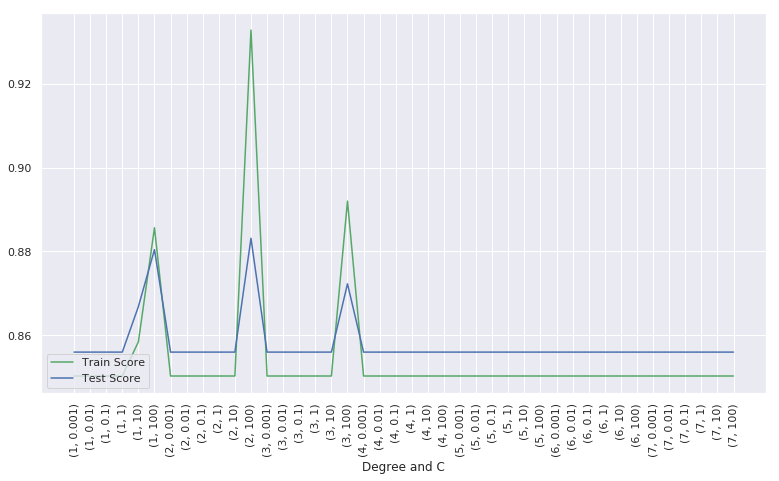

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
fig ,ax= plt.subplots(figsize = (13,7))
plt.plot(range(len(index)), train_score_list, c = 'g', label = 'Train Score')
plt.plot(range(len(index)), test_score_list, c = 'b', label = 'Test Score')
plt.legend(loc = 3)
plt.grid(True)
plt.xticks(range(len(index)), index, rotation=90)
plt.xlabel('Degree and C')

`Degree = 1 and C = 100 seems to be the best performing parameter`

In [0]:
svc_poly = SVC(kernel='poly', degree=1, C=100)
svc_poly.fit(X_train,y_train)

print("Train scores: {}".format(svc_poly.score(X_train, y_train)))
print("Test scores: {}".format(svc_poly.score(X_test, y_test)))

pred_poly = svc_poly.predict(X_test)

confusion = confusion_matrix(y_test, pred_poly)
print("Confusion matrix:\n{}".format(confusion))

print('\nAccuracy = {:.4f}'.format((15+309)/(309+15+38+6)*100))

Train scores: 0.8856624319419237
Test scores: 0.8804347826086957
Confusion matrix:
[[309   6]
 [ 38  15]]

Accuracy = 88.0435


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [0]:
print('Recall = {:.4f}'.format((15/(38+15))))

Recall = 0.2830


`This is the same as LinearSVC`

In [0]:
precisions, recall, f1_score, _ = metrics.precision_recall_fscore_support(y_test, pred_poly)
print("Recall Score (test): %.4f" % recall[1:])
print("Precision Score (test): %.4f" % precisions[1:])
print("F1 Score (test): %.4f" % f1_score[1:])
print("AUC Score (test): %.4f" % metrics.roc_auc_score(y_test, pred_poly))

Recall Score (test): 0.2830
Precision Score (test): 0.7143
F1 Score (test): 0.4054
AUC Score (test): 0.6320


## SVC Kernel - Linear

In [0]:
c_range = [0.001,0.01,0.1,1,10,100]

train_score_list = []
test_score_list = []

for x in c_range:
    svc_lin = SVC(kernel='linear', C=x)
    svc_lin.fit(X_train,y_train)
    train_score_list.append(svc_lin.score(X_train,y_train))
    test_score_list.append(svc_lin.score(X_test, y_test))

print(train_score_list)
print(test_score_list)

[0.8502722323049002, 0.8502722323049002, 0.8502722323049002, 0.8820326678765881, 0.8865698729582577, 0.8883847549909256]
[0.8559782608695652, 0.8559782608695652, 0.8559782608695652, 0.875, 0.8858695652173914, 0.8885869565217391]


Text(0.5, 0, 'C')

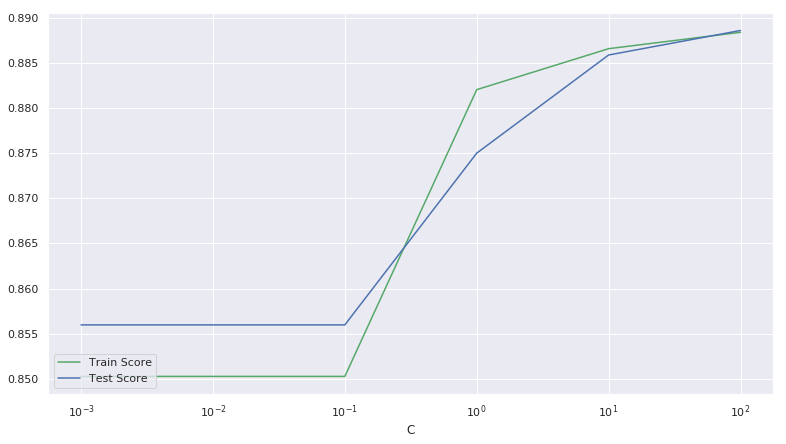

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
fig ,ax= plt.subplots(figsize = (13,7))
plt.plot(c_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(c_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel('C')

`C = 100 seems to be the best parameter`

In [0]:
svc_lin = SVC(kernel='linear', C=100)
svc_lin.fit(X_train,y_train)

print("Train scores: {}".format(svc_lin.score(X_train, y_train)))
print("Test scores: {}".format(svc_lin.score(X_test, y_test)))

pred_lin = svc_lin.predict(X_test)

confusion = confusion_matrix(y_test, pred_lin)
print("Confusion matrix:\n{}".format(confusion))
print('\nAccuracy = {:.4f}'.format((18+309)/(309+18+35+6)*100))

Train scores: 0.8883847549909256
Test scores: 0.8885869565217391
Confusion matrix:
[[309   6]
 [ 35  18]]

Accuracy = 88.8587


In [0]:
print('Recall = {:.4f}'.format((18/(35+18))))

Recall = 0.3396


`This is one of the better performing models`

In [0]:
precisions, recall, f1_score, _ = metrics.precision_recall_fscore_support(y_test, pred_lin)
print("Recall Score (test): %.4f" % recall[1:])
print("Precision Score (test): %.4f" % precisions[1:])
print("F1 Score (test): %.4f" % f1_score[1:])
print("AUC Score (test): %.4f" % metrics.roc_auc_score(y_test, pred_lin))

Recall Score (test): 0.3396
Precision Score (test): 0.7500
F1 Score (test): 0.4675
AUC Score (test): 0.6603


## Decision Tree


In [0]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(random_state=0)

dtree.fit(X_train_org, y_train)

print("Accuracy on training set: {:.3f}".format(dtree.score(X_train_org, y_train)))
print("Accuracy on test set: {:.3f}".format(dtree.score(X_test_org, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.796


In [0]:
max_range = [1,2,3,4,5,6,7,8,9,10]

train_score_list = []
test_score_list = []

for m in max_range:
    dtree = DecisionTreeClassifier(max_depth=m, random_state=0)
    dtree.fit(X_train_org, y_train)
    train_score_list.append(dtree.score(X_train_org,y_train))
    test_score_list.append(dtree.score(X_test_org, y_test))

In [0]:
print(train_score_list)
print(test_score_list)

[0.8502722323049002, 0.8575317604355717, 0.8638838475499092, 0.8802177858439202, 0.895644283121597, 0.9210526315789473, 0.9437386569872959, 0.9627949183303085, 0.9764065335753176, 0.9827586206896551]
[0.8559782608695652, 0.8532608695652174, 0.8586956521739131, 0.8532608695652174, 0.8478260869565217, 0.8260869565217391, 0.8342391304347826, 0.8097826086956522, 0.8152173913043478, 0.8097826086956522]


Text(0.5, 0, 'Max Depth')

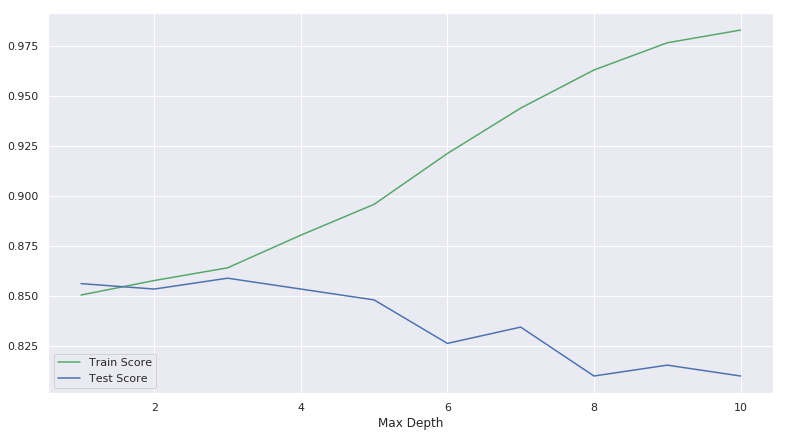

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
fig ,ax= plt.subplots(figsize = (13,7))
plt.plot(max_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(max_range, test_score_list, c = 'b', label = 'Test Score')
plt.legend(loc = 3)
plt.xlabel('Max Depth')

`Max Depth = 3 seems to be the best performing parameter`

In [0]:
dtree = DecisionTreeClassifier(max_depth=3, random_state=0)
dtree.fit(X_train_org, y_train)

pred_d = dtree.predict(X_test_org)

In [0]:
print("Accuracy on training set: {:.4f}".format(dtree.score(X_train_org, y_train)))
print("Accuracy on test set: {:.4f}".format(dtree.score(X_test_org, y_test)))

Accuracy on training set: 0.8639
Accuracy on test set: 0.8587


In [0]:
confusion = confusion_matrix(y_test, pred_d)
print("Confusion matrix:\n{}".format(confusion))
print('\nAccuracy = {:.4f}'.format((3+313)/(313+50+2+3)*100))

Confusion matrix:
[[313   2]
 [ 50   3]]

Accuracy = 85.8696


In [0]:
print('Recall = {:.4f}'.format((3/(50+3))))

Recall = 0.0566


`This is one of the lower performing models`

In [0]:
precisions, recall, f1_score, _ = metrics.precision_recall_fscore_support(y_test, pred_d)
print("Recall Score (test): %.4f" % recall[1:])
print("Precision Score (test): %.4f" % precisions[1:])
print("F1 Score (test): %.4f" % f1_score[1:])
print("AUC Score (test): %.4f" % metrics.roc_auc_score(y_test, pred_d))

Recall Score (test): 0.0566
Precision Score (test): 0.6000
F1 Score (test): 0.1034
AUC Score (test): 0.5251


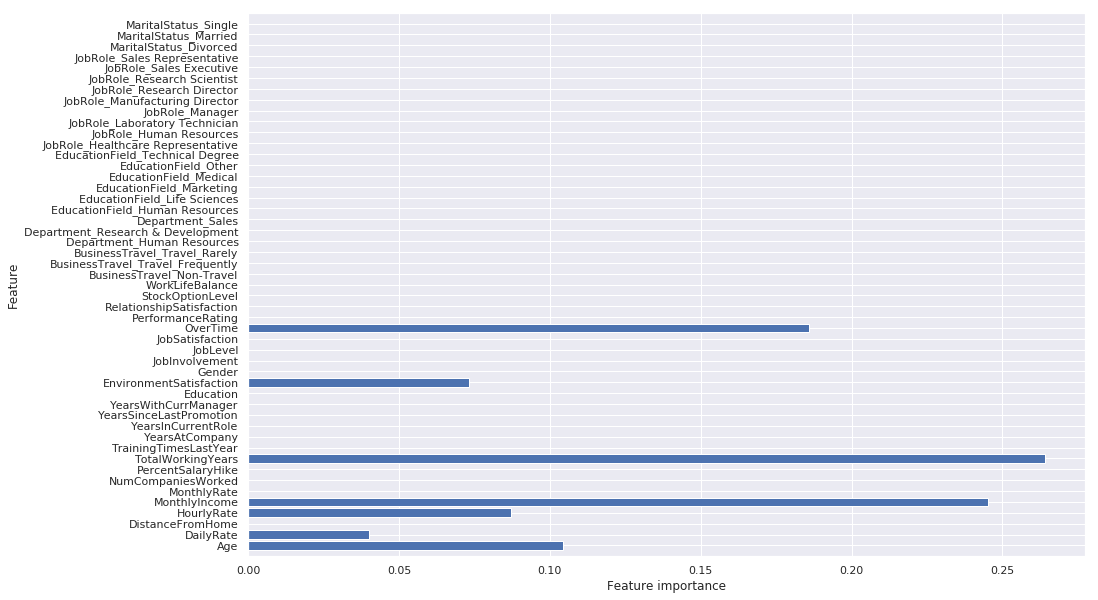

In [0]:
%matplotlib inline
def plot_feature_importances(model):
    fig ,ax= plt.subplots(figsize = (15,10))
    n_features = X_train_org.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train_org.columns.values)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances(dtree)

`Total Woking Years is the most important feature`

# Best Performing Model - Logistic Regression

**Train scores:** 0.8883

**Test scores:** 0.8885

**Confusion matrix:**

[[307   8]

[ 33  20]]

**Accuracy** = 88.8587

**Recall** = 0.3774